# 04 - Evaluation
This notebook evaluates the trained model using accuracy, F1-score, and confusion matrix.

In [4]:
# Import libraries and load processed data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/processed_aqi.csv')

In [5]:
# Split data, load model, and evaluate predictions
features = [c for c in df.columns if c not in ["AQI_Bucket", "Date"]]
X = df[features]
y = df["AQI_Bucket"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00      1766
           2       1.00      1.00      1.00       556
           3       1.00      1.00      1.00      1645
           4       1.00      1.00      1.00       268
           5       1.00      1.00      1.00       467

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



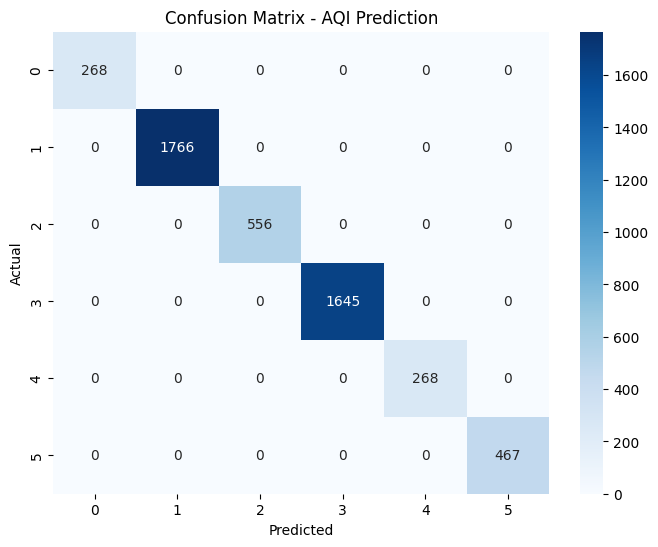

In [6]:
# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AQI Prediction")
plt.show()

✅ Model evaluation complete.